In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
#уникальных кампаний
df.xyz_campaign_id.nunique()

3

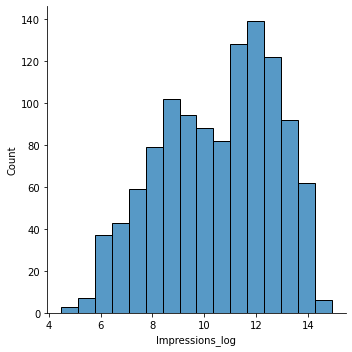

In [4]:
#гистограмма распеределния показов рекламных компаний

df['Impressions_log'] = np.log(df.Impressions) #логарифмируем значения
sns.displot(data = df, x ='Impressions_log')

In [5]:
#рассчитаем метрику CTR, выбрать ad_id с макс ctr
df['ctr'] = df.Clicks / df.Impressions
df.sort_values('ctr', ascending=False).head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Impressions_log,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,6.850126,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,7.769379,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,8.094684,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,8.576782,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,7.541152,0.000531


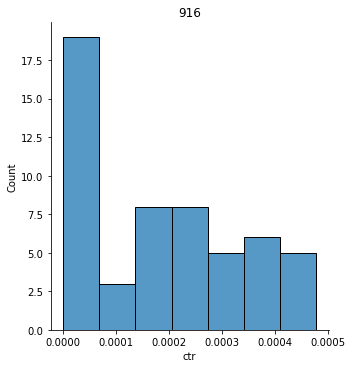

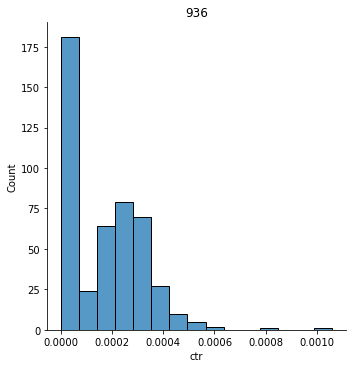

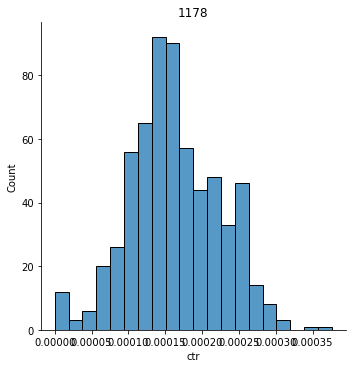

In [6]:
#распределение ctr по номеру рекламной компании
campaing_id_unique = df.xyz_campaign_id.unique()
for i in campaing_id_unique:    
    
    sns.displot(x='ctr', data=df.query("xyz_campaign_id == @i")).set(title=i)

In [7]:
#рассчитаем метрику CPC(cost per click), выбрать ad_id с макс ctr
df['cpc'] = df.Spent / df.Clicks
df['cpc'].describe()


count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [8]:
#посчитать межквартильный размах метрики cpc
print(1.644364 - 1.390000)
ss.iqr(df.cpc, nan_policy='omit')

0.25436400000000003


0.2543636990499998

<Figure size 720x504 with 0 Axes>

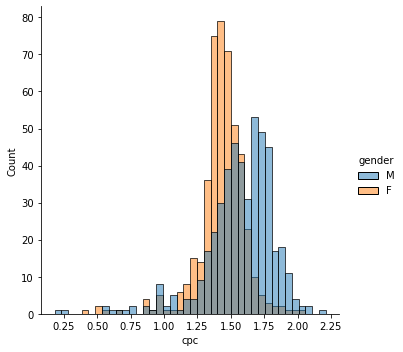

In [9]:
#распределение cpc по номеру полу
plt.figure(figsize=(10,7))
sns.displot(x='cpc', data=df.dropna(), hue='gender')

In [10]:
#конверсия клик-покупка
df['click_to_purchase_rate'] = df.Approved_Conversion /df.Clicks

#конверсия клик-покупка по объявлению 1121814 в процентах
round(df.loc[df['ad_id'] == 1121814].click_to_purchase_rate * 100, 2)


860    3.09
Name: click_to_purchase_rate, dtype: float64